In [ ]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split



df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine_1.csv')

def MAVG(df):
    mv_lis=[]
    for i in range(df.shape[0]):
        row = df.iloc[i]
        mv_lis.append((row.MMIN+row.MMAX)/2*pow(10,-3))
    MAVG=pd.Series(mv_lis)
    df=df.assign(MAVG=MAVG.values)
    return df

def CHCAP(df):
    ch_lis=[]
    for i in range(df.shape[0]):
        row = df.iloc[i]
        chavg = math.floor(((row.CHMIN+row.CHMAX)/2)+1)
        speed = 1/row.MCYT
        ch_lis.append(chavg*speed+10)
    CHCAP=pd.Series(ch_lis)
    df=df.assign(CHCAP=CHCAP.values)
    return df

def SQR(df):
    sqr_lis=[]
    for i in range(df.shape[0]):
        row = df.iloc[i]
        sqr = math.sqrt(row.ERP)
        sqr_lis.append(sqr)
    SQRPERF=pd.Series(sqr_lis)
    df=df.assign(SQRPERF=SQRPERF.values)
    return df

df=MAVG(df)
df=CHCAP(df)
df=SQR(df)



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/dulce-bits/dataset_RP_U1/master/machine_edited.csv'

df=pd.read_csv(url)

train,test=train_test_split(df,test_size=0.5,train_size=0.5)

import statsmodels.formula.api as smfrmla
model = smfrmla.ols("SQRPERF ~ MAVG + CACH + CHCAP",train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                SQRPERF   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.924e+06
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          6.97e-238
Time:                        07:55:33   Log-Likelihood:                 242.66
No. Observations:                 104   AIC:                            -477.3
Df Residuals:                     100   BIC:                            -466.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2653      0.084   -181.499      0.0

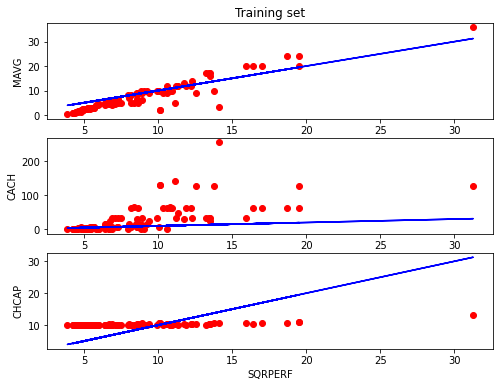

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/dulce-bits/dataset_RP_U1/master/machine_edited.csv'

df=pd.read_csv(url)

train,test=train_test_split(df,test_size=0.5,train_size=0.5)

import statsmodels.formula.api as smfrmla
model = smfrmla.ols("SQRPERF ~ MAVG + CACH + CHCAP",train).fit()

x_train = train[['MAVG','CACH','CHCAP']]
y_train = train['SQRPERF']
f_train = model.predict(x_train)

import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.subplot(3,1,1)
plt.scatter(y_train,x_train[['MAVG']], color='r')
plt.plot(y_train, f_train, color='b')
plt.title('Training set')
plt.ylabel('MAVG')

plt.subplot(3,1,2)
plt.scatter(y_train,x_train[['CACH']], color='r')
plt.plot(y_train, f_train, color='b')
plt.ylabel('CACH')
plt.xlabel('SQRPERF')

plt.subplot(3,1,3)
plt.scatter(y_train,x_train[['CHCAP']], color='r')
plt.plot(y_train, f_train, color='b')
plt.ylabel('CHCAP')
plt.xlabel('SQRPERF')

plt.show()

Test set results
> predicted= 5.336690707762685, actual= 5.291502622129181
> predicted= 19.523977915011336, actual= 19.519221295943137
> predicted= 5.271606284184106, actual= 5.291502622129181
> predicted= 5.256726340425693, actual= 5.291502622129181
> predicted= 5.127710877563274, actual= 5.0990195135927845
> predicted= 9.076904022609428, actual= 9.055385138137416
> predicted= 15.912872223950245, actual= 15.905973720586864
> predicted= 4.780687562793624, actual= 4.795831523312719
> predicted= 7.26434928219939, actual= 7.280109889280517
> predicted= 6.835414668380428, actual= 6.855654600401044
> predicted= 4.713344499838666, actual= 4.69041575982343
> predicted= 18.9911142744712, actual= 19.0
> predicted= 8.351968033286887, actual= 8.366600265340756
> predicted= 4.7562610846986235, actual= 4.795831523312719
> predicted= 4.763982194024978, actual= 4.795831523312719
> predicted= 6.006046412364686, actual= 6.0
> predicted= 7.474604103750945, actual= 7.483314773547883
> predicted= 19.52397

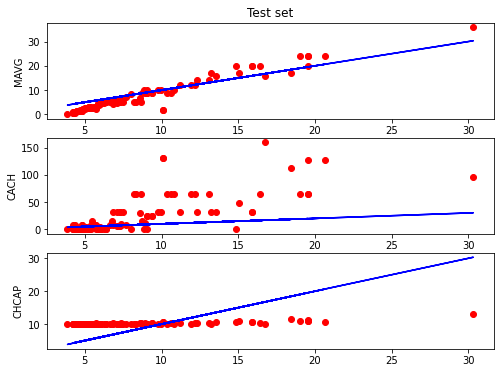

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/dulce-bits/dataset_RP_U1/master/machine_edited.csv'

df=pd.read_csv(url)

train,test=train_test_split(df,test_size=0.5,train_size=0.5)

import statsmodels.formula.api as smfrmla
model = smfrmla.ols("SQRPERF ~ MAVG + CACH + CHCAP",train).fit()

x_test = test[['MAVG','CACH','CHCAP']]
y_test = test['SQRPERF']
f_test = model.predict(x_test)

print('Test set results')
for i in range(y_test.shape[0]):
    pre = f_test.iloc[i]
    act = y_test.iloc[i]
    print('> predicted= '+ str(pre) + ', actual= '+ str(act))

import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.subplot(3,1,1)
plt.scatter(y_test,x_test[['MAVG']], color='r')
plt.plot(y_test, f_test, color='b')
plt.title('Test set')
plt.ylabel('MAVG')

plt.subplot(3,1,2)
plt.scatter(y_test,x_test[['CACH']], color='r')
plt.plot(y_test, f_test, color='b')
plt.ylabel('CACH')

plt.subplot(3,1,3)
plt.scatter(y_test,x_test[['CHCAP']], color='r')
plt.plot(y_test, f_test, color='b')
plt.ylabel('CHCAP')

plt.show()


> predicted=14.918356064113835, actual=14.106735979665885
> predicted=14.491283743621443, actual=15.905973720586864
> predicted=10.628958650004142, actual=11.489125293076055
> predicted=17.537503439234467, actual=19.519221295943137
> predicted=17.537503439234467, actual=19.519221295943137
> predicted=22.77533946025323, actual=35.18522417151837
> predicted=4.86459683148181, actual=4.795831523312719
> predicted=10.893272363710333, actual=10.816653826391967
> predicted=4.079576552981454, actual=3.8729833462074175
> predicted=6.501258945410764, actual=8.0
> predicted=5.2273415859503825, actual=5.385164807134505
> predicted=11.327686209604792, actual=11.135528725660043
> predicted=5.830951894845302, actual=5.916079783099617
> predicted=5.291502622129181, actual=5.291502622129181
> predicted=5.291502622129181, actual=5.291502622129181
> predicted=4.860191564704993, actual=4.69041575982343
> predicted=5.096500540429441, actual=5.196152422706632
> predicted=8.830289695680316, actual=8.60232526

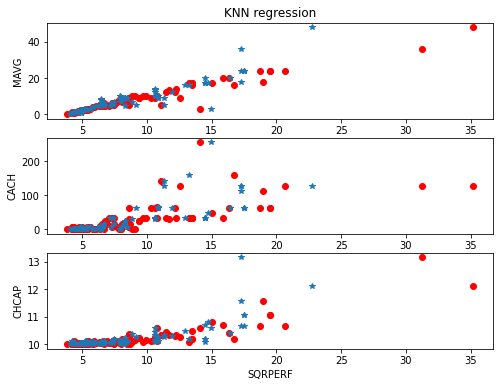

In [13]:
import pandas as pd
import random

def load_and_split_dataset(filename, approx_training_perc = 0.6):
    # lee el conjunto de datos Iris en un dataframe
    df = pd.read_csv(filename, header=None)
    # convierte el dataframe en una lista de listas
    l = df.values.tolist()
    # separa, aleatoriamente, un conjunto de instancias como el conjunto entrenamiento
    # y el resto, será un conjunto de pruebas
    training_set = []
    test_set = []
    for instance in l:
        if random.random() < approx_training_perc:
            training_set.append(instance)
        else:
            test_set.append(instance)
    return (training_set, test_set)

# funcion que calcula la distancia euclidiana entre dos instancias
import math
def euclidian_distance(instance1, instance2):
    dist = 0
    features=[5,10,11]
    for x in features:
        dist += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(dist)

# obtiene los K vecinos mas cercanos
def get_neighbors(training_set, test_instance, k):
    distances = []
    for training_instance in training_set:
        dist = euclidian_distance(test_instance, training_instance)
        distances.append((dist, training_instance))
    distances.sort()
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])
    return neighbors

# toma la decision con base al vecindario
import operator
def take_decision(neighbors):
    total=0
    for neighbor in neighbors:
        total+=neighbor[-1]
    return total/len(neighbors)

def get_accuracy(test_set, predictions):
    from scipy.stats import sem
    res = sem([[test_set],[predictions]])
    return res[0][0]


url='https://raw.githubusercontent.com/dulce-bits/dataset_RP_U1/master/machine_edited2.csv'
# lee conjunto de datos 
(training_set, test_set) = load_and_split_dataset(url, .5)


# genera predicciones
predictions=[]
k = 3
for instance in test_set:
    neighbors = get_neighbors(training_set, instance, k)
    result = take_decision(neighbors)
    predictions.append(result)
    print('> predicted=' + str(result) + ', actual=' + str(instance[-1]))

import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 6)) # una figura con tamaño de 8 x 6
plt.clf() # clear figure

labels=['vendor','model','MCYT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP','MAVG','CHCAP','SQRPERF']
test = pd.DataFrame(test_set, columns=labels)
x_test = test[['MAVG','CACH','CHCAP']]
y_test = test['SQRPERF']
f_test = pd.Series(predictions)

plt.subplot(3,1,1)
plt.scatter(y_test, x_test[['MAVG']], color='r')
plt.plot(f_test,x_test[['MAVG']],'*')
plt.ylabel('MAVG')
plt.title('KNN regression')

plt.subplot(3,1,2)
plt.scatter(y_test, x_test[['CACH']], color='r')
plt.plot(f_test, x_test[['CACH']],'*')
plt.ylabel('CACH')

plt.subplot(3,1,3)
plt.scatter(y_test, x_test[['CHCAP']], color='r')
plt.plot(f_test, x_test[['CHCAP']],'*')
plt.ylabel('CHCAP')
plt.xlabel('SQRPERF')

plt.show()
